# Welcome back :)

![](https://media.giphy.com/media/8vIFoKU8s4m4CBqCao/giphy.gif)

# O nosso modelo _realmente_ é bom?

Vimos nos ultimos tópicos como criamos um modelo de Machine Learning, como verificamos suas métricas e vemos se ele é bom. Contúdo, nossa maior motivação é **criar** modelos que generalizem para dados **nunca** vistos anteriormente. E como sabemos se o nosso modelo está **generalizando** adequadamente?

## Generalização

In [1]:
from IPython.display import YouTubeVideo

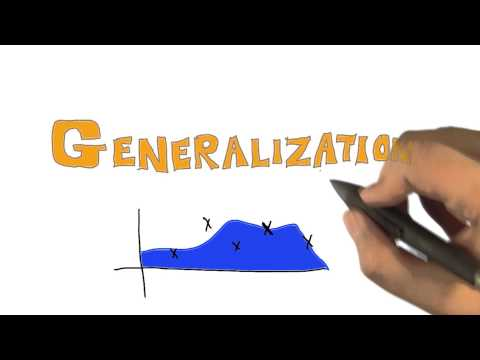

In [6]:
YouTubeVideo('lAKL7dCcBqk', end=72)

Com base no que viram **o que é generalization** em MachineLearning?

## Overfitting e Underfitting

A ideia de construir um modelo que **generalize** é refletida no que podemos definir pela ideia de *overfitting* e *underfitting*. Com isso podemos responder as seguintes perguntas:

- O modelo pode ser simplifcado? Ou deve ser mais complexo?
- Podemos adicionar mais features?
- Precisamos de mais dados?


![](../imgs/underfit-over.png)

>We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data.


[Source](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)


Em outras palavras, quando falamos de overfitting e underfitting estão associados **com os erros** que nosso modelo tem. Mas como medimos isso?

# Train Validation Test


Essas três palavras mágicas vão te seguir por toda a sua jornada do mundo de Machine Learning. Basicamente queremos sempre dividir nossos dados em três:

- Amostra de Treino (Onde treinamos nosso modelo, com a maior parte do dado)
- Amostra de Validação (Para evitar overfitting, temos uma amostra para validar os hiperparâmetos do modelo, como learning_rate)
- Amostra de Teste (Uma amostra em que não criamos influência nenhuma e evitamos ver ao máximo possível)

Geralmente a proporção de dados em cada um depende do dado, mas é comum usarmos 0.8 pra treino, 0.1 pra validação e 0.1 pra teste. Vamos a um exemplo, retomando os dados que estamos acostumados


In [111]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')



from matplotlib import pyplot as plt
import seaborn as sns
# Graphics in SVG format are more sharp and legible
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
DATAPATH = '../data'

def obtain_metrics(y_true, y_pred):
    print(f"R2 do Modelo: {r2_score(y_true, y_pred)}")
    print(f"MSE do Modelo: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE do Modelo: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    
data = pd.read_csv(f'{DATAPATH}/house-prices.csv', index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


O sklearn dispõe da função `train_test_split` em que podemos separar os nossos dados adequadamente

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
features = list(set(data.columns) - set(['SalePrice']))
target = ['SalePrice']

In [114]:
X_train, X_val, y_train, y_val = train_test_split(
    data[features], data[target], train_size=0.8, random_state=42
)  # reproducibilidade

In [115]:
X_train.shape

(1168, 79)

In [116]:
X_val.shape

(292, 79)

In [117]:
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, train_size=0.5, random_state=42
)  # reproducibilidade

In [118]:
X_train.shape, X_val.shape, X_test.shape

((1168, 79), (146, 79), (146, 79))

In [119]:
features = ['LotArea', 'GrLivArea', 'GarageCars', 'LotFrontage', 'YearBuilt']

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
lr =  LinearRegression()

lr.fit(X_train[features].fillna(X_train[features].mean()), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
obtain_metrics(
    y_train,
    lr.predict(X_train[features].fillna(X_train[features].mean())),
)

R2 do Modelo: 0.6854347879951247
MSE do Modelo: 1876240054.7262666
RMSE do Modelo: 43315.58674110587


In [123]:
obtain_metrics(
    y_val,
    lr.predict(X_val[features].fillna(X_train[features].mean())), 
    #NUNCA USAMOS DADOS DE VALIDACAO OU TESTE PRA INFERIR
)

R2 do Modelo: 0.7340572931387517
MSE do Modelo: 1558073679.7099292
RMSE do Modelo: 39472.44202871073


In [124]:
obtain_metrics(
    y_test,
    lr.predict(X_test[features].fillna(X_train[features].mean())), 
    #NUNCA USAMOS DADOS DE VALIDACAO OU TESTE PRA INFERIR
)

R2 do Modelo: 0.6907057549173587
MSE do Modelo: 2910140014.61692
RMSE do Modelo: 53945.71358891195


Esses valores foram relativamente próximos, o que indica que não existe overfitting do modelo. Se a diferença entre treino e teste fosse muito intensa, estaríamos vendo um caso de overfitting!

![](../imgs/chihuahuas-and-muffins.jpeg)

## Um pouco mais de Robustez

Se não estamos trabalhando com dados muito pesados, uma ideia mais **poderosa** do que só separar os dados uma única vez, é repetir esse processo um número $k$ de vezes e tirar a média. Essa é a ideia por trás do Cross Validation, que também é usada para evitar Overfitting!

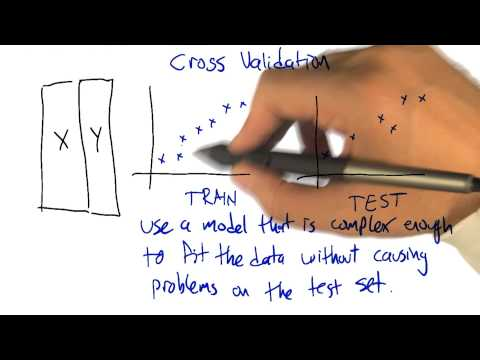

In [125]:
YouTubeVideo('sFO2ff-gTh0')

Resumindo em uma imagem:

<img src="../imgs/grid_search_cross_validation.png" width="800"/>


Então vamos isolar o nosso X_test, y_test isolados, mas vamos reunir o X_train e o X_val :)

In [126]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [127]:
from sklearn.model_selection import cross_val_score

In [129]:
mean_ = X_train[features].mean()

In [136]:
scores = cross_val_score(lr, X_train[features].fillna(mean_), y_train, cv=5, scoring='r2')

In [137]:
scores.mean()

0.6608290767894065

In [138]:
r2_score(y_test, lr.predict(X_test[features].fillna(mean_)))

0.6907054993080473

Logo, não estamos overfitando nem underfitando :)

# Validando Graficamente

## Learning Curves
Traduzido [daqui](https://mlcourse.ai/articles/topic4-part5-validation/)

> Quantos mais dados o modelo usar, melhor. Mas como que entedemos se novos dados serão uteis para uma dada situação? Por exemplo, vale investir $N$ pessoas para dobrar o dataset?

> Uma vez que adquirir novos dados pode ser inviável, vale  a pena variar o tamanho dos dados de treinamento e ver como a qualidade da solução depende da quantidade de treinamento. Essa é a ideia por trás de Learning Curves

> A ideia é simples: nós plotamos o erro como uma função em relação aos exemplos dos dados de treinamento, fixando os parâmetos do modelo


Retirado [daqui](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

In [97]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, score='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/abarbosa/miniconda3/envs/semcomp2019/lib/python3.6/site-packages/matplotlib/pyplot.py'>

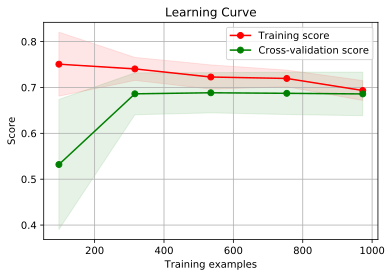

In [99]:
plot_learning_curve(
    estimator=lr,
    title="Learning Curve",
    X=data[features].fillna(data[features].mean()),
    y=data[target],
)

## Bias-Variance Tradeoff
Basicamente, se **as duas curvas estiverem próximas**, nosso modelo está sofrendo de **High Bias** e, então, aumentar o número de dados de treinamento talvez não ajude muito. Caso haja uma distância entre os dois, então aumentar o número de dados de treinamento pode ajudar, uma vez que o modelo está sofrendo de **High variance**

<img src="../imgs/bias-variance-tradeoff.png" width="400"/>


Problemas de **bias** ocorrem quando ocorre uma "super simplificação" dos nossos dados. Um exemplo, seria se tivessemos um modelo **que sempre prevê a média**. Ou seja, o modelo é tão simplificado que ele não consegue fitar os dados direito e, então, estão associados a **underfitting**.


Problemas de **variance** ocorrem quando ocorre uma "super complexidade" dos nossos dados. Colocamos tantas features que temos mais features do que número de dados e o grau de complexidade é tão alto que a **generalização** é ruim uma vez que ele decora os dados de treino, ele **overfitta**


Queremos sempre um modelo que consiga **fitar o conjunto de dados** e **mas generalize bem**. Em outras palavras, buscamos um equilíbrio entre bias e o variance do modelo!

In [142]:
pd.qcut(data['SalePrice'], q=2, labels=['Barato', 'Caro'])

Id
1         Caro
2         Caro
3         Caro
4       Barato
5         Caro
         ...  
1456      Caro
1457      Caro
1458      Caro
1459    Barato
1460    Barato
Name: SalePrice, Length: 1460, dtype: category
Categories (2, object): [Barato < Caro]

In [148]:
data['ClassPrice'] = pd.qcut(data['SalePrice'], q=2, labels=['Cheap', 'Expensive'])

In [149]:
del data['SalePrice']

In [152]:
data.to_csv('../data/house-classes.csv')

In [153]:
pd.read_csv('../data/house-classes.csv',)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ClassPrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Expensive
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Expensive
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Expensive
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Cheap
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,Expensive
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,Expensive
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,Expensive
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,Cheap
